<a href="https://colab.research.google.com/github/RoyPrs/Technical-Writings/blob/master/Bitcoin_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> #### **”In God we trust. All others must bring data.”**📊😁
W. Edwards Deming<br/>


# Bitcoin
## A Statistical Analysis
### Author: Roya Parsaee 👩

Bitcoin is the earliest and most widespread and successful cryptocurrency in the world. In the wake of its popularity, Bitcoin has inspired the development of a whole host of other virtual currencies.

As Bitcoin grew in popularity, investors and speculators became more and more interested in it. To facilitate Bitcoin sales and purchases, cryptocurrency exchanges emerged between 2009 and 2017. Prices began to rise, and demand slowly grew until 2017, when its price broke $1,000. Many people believed Bitcoin prices would keep climbing and began buying them to hold. Traders began using cryptocurrency exchanges to make short-term trades, and the market took off.

Bitcoin has a short investing history filled with very volatile prices, making it a rather risky asset to trade and invest in.
Traders all over the world, use various tools and techniques to monitor Bitcoin price fluctuations very closely and analyze them from a technical or fundamental perspective in order to find clues to predict the next price moves.

This article however has taken another approach to analyze Bitcoin. We look at the history of Bitcoin from a statistical point of view. The main goal is to help the reader obtain an objective grasp of the risks and rewards that go along with trading Bitcoin. The reader of this article is supposed to have at least a passing awareness of statistics tenets. In addition, a working knowledge of programming with Python is also a must.

Ready? Let's dive in!


### Get and Depict Bitcoin Data 

To get Bitcoin data we use fastquant, a Python package that gives us the means to  easily access historical stock data and backtest and optimize trading strategies with only a few lines of code.

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

# !pip install --target=$nb_path fastquant

Mounted at /content/mnt


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from fastquant import get_crypto_data
import datetime


start = "2017-1-1"
end = str(datetime.date.today())
btc = get_crypto_data("BTC/USDT", start, end)
btc.tail()

btc.close.plot(figsize=(15, 5), ylabel='Price', xlabel='Day', title="Daily Closing Price of BTC/USD", fontsize=10)

,Date,Open,High,Low,Close,Volume,LOGRETURN,Return
1862,2022-09-22,18461.36,19550.17,18356.39,19401.63,379321.72111,-0.005775,-111.72
1863,2022-09-23,19401.63,19500.00,18531.42,19289.91,385886.91829,-0.019336,-369.41
1864,2022-09-24,19288.57,19316.14,18805.34,18920.50,239496.56746,-0.005997,-113.12
1865,2022-09-25,18921.99,19180.21,18629.20,18807.38,191191.44920,0.023526,447.70
1866,2022-09-26,18809.13,19277.15,18680.72,19255.08,151983.38871,NaN,NaN


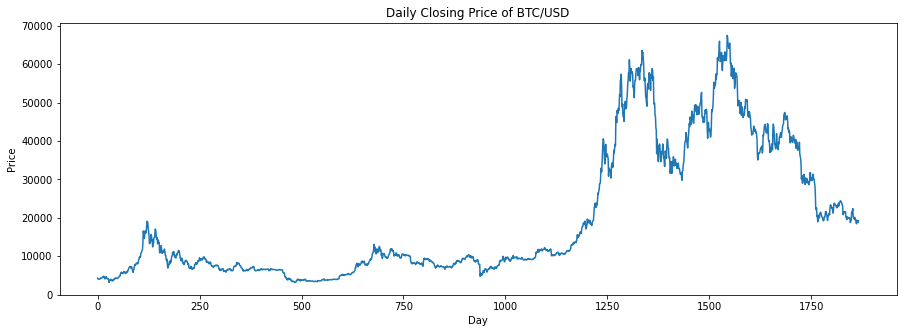

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
col_names = ['Date', 'Open', 'High', 'Low', 'Close','Volume', 'LOGRETURN']

btc = pd.read_csv('bitcoin.csv', header=0, names=col_names) 
btc['Return'] = btc['Close'].shift(-1) - btc['Close']
btc.Close.plot(figsize=(15, 5), ylabel='Price', xlabel='Day', title="Daily Closing Price of BTC/USD", fontsize=10)
btc.tail()


### Modeling Bitcoin Return
In this section, we will use **Normal Random Variable** to model Bitcoin Return and show the importance of random variable distribution in identifying financial risks. 

Let's start with a fundamental question.
Why is it essential to know the distribution of Log Return or try to model it? The short answer is that it is really critical in risk management. For instance, from November 2021 to June 2022, roughly eight months, Bitcoin's price dropped over 70%. We need to calculate the probability that the annual return will be less than, say -50%. Is that really possible, or it is just an extreme case like the black swan? 

To that end, first, we compute the daily log return for Bitcoin and plot its histogram. 
As you can see, the histogram is symmetric and bell-shaped, which is very similar to normal distribution.

<AxesSubplot:>

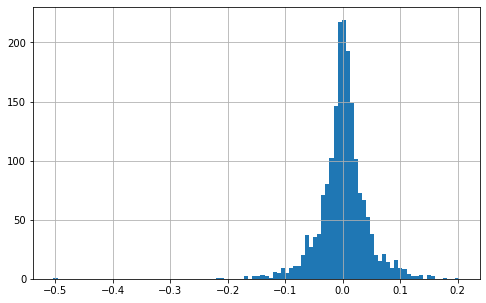

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

btc['LogReturn'] = np.log(btc['Close']).shift(-1) - np.log(btc['Close'])
btc['LogReturn'].hist(bins=100, figsize=(8, 5))


Now we are ready to model daily Bitcoin Log Return using normal distribution. We do not know the real Mean and Standard Deviation of this normal random variable but we do have a large collection of Log Return data from historic records, so we can calculate the Mean and the Standard Deviation for this collection. Of course, they are not the same as those of normal variable, but close enough for our current purpose.

Since the density function of normal variables is only related to their mean and variance, we also can get a Cumulative Distribution Function, or in short a CDF which outputs the probability for the area to the left side of each possible value. 

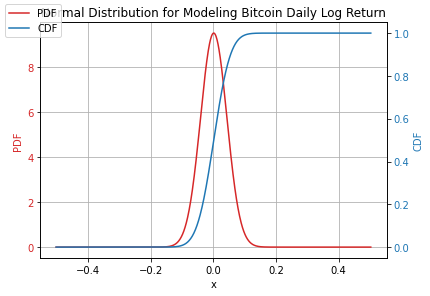

In [ ]:
# Calculating Mean and Statndard Deviation
mu = btc['LogReturn'].mean() 
sigma = btc['LogReturn'].std(ddof=1) 

#For aesthetic reasons :-D. If symmetry doesn't matter to you, comment out this line and use the next line placing it below linw 10.
interval = max(abs(btc['LogReturn'].min()), abs(btc['LogReturn'].max())) 
# density['x'] = np.arange(btc['LogReturn'].min()-0.01, btc['LogReturn'].max()+0.01, 0.001) 

# Getting the Probability Density Function and Cumulative Density Function
density = pd.DataFrame()
density['x'] = np.arange(-interval, interval, 0.001)

density['pdf'] = norm.pdf(density['x'], mu, sigma)
density['cdf'] = norm.cdf(density['x'], mu, sigma)

# Plot PDF and CDF
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(density['x'], density['pdf'], color=color, label='PDF')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('CDF', color=color)  
ax2.plot(density['x'], density['cdf'], color=color, label='CDF')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc="upper left")
plt.title("Normal Distribution for Modeling Bitcoin Daily Log Return")
plt.show()


## Loss/Profit Probabilities

Then, what is the chance that Bitcoin Log Return drops more than 5% during a single day? 

To figure out the solution, we plot the Normal Density Curve for daily Bitcoin Log Return. The pink area is the probability of losing more than 5% in one day. We can use CDF to get this probability, which is about 11%. Hence there is about an 11% chance of losing at least 5% during a single day.


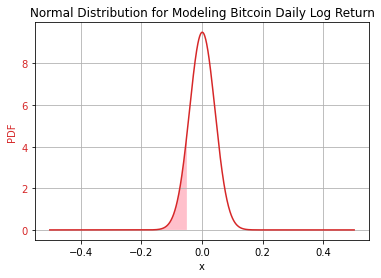

The probability of loosing at least five percent in a single day is: 0.11314611655816381


In [ ]:
# Visualize the probability of at least 5% daily loss

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(density['x'], density['pdf'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x=np.arange(-0.2, -0.05, 0.001), y2=0, y1=norm.pdf(np.arange(-0.2, -0.05, 0.001), mu, sigma), facecolor='pink')
plt.grid()
plt.title("Normal Distribution for Modeling Bitcoin Daily Log Return")
plt.show()

msg = "The probability of loosing at least five percent in a single day is: {}"
change = -0.05
prob_return = norm.cdf(change, mu, sigma)
print(msg.format(prob_return))


So, there is about 11 percent chance for Bitcoin Log Return to drop at least 5 percent during a single day.

Seems desperately dissappoiting, right? 😥 

So let's calculate the probability for some more Log Returns. The probabilities related to the days-of-reward may be promising.

Probability of 0 to 5 percent return for Bitcoin in a single day: 0.3869734564555192


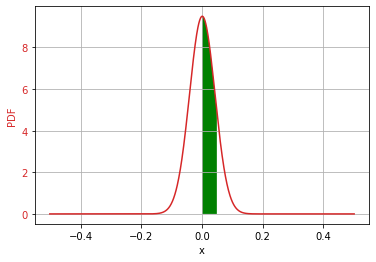

In [ ]:
# Probability of 0 to 5 percent return in a single day
prob_return = norm.cdf(0.05, mu, sigma) - norm.cdf(0.0, mu, sigma)
print('Probability of 0 to 5 percent return for Bitcoin in a single day: {}'.format(prob_return))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(density['x'], density['pdf'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x=np.arange(0, 0.05, 0.001), y2=0, y1=norm.pdf(np.arange(0, 0.05, 0.001), mu, sigma), facecolor='green')
plt.grid()
plt.title("Normal Distribution for Modeling Bitcoin Daily Log Return")
plt.show()

## Probabilities for Annual Return
In this section, our goal is to find out how is likely the Log Return of Bitcoin to drop over 50% in the course of one year, which has 220 trading days.

We will use another Normal Distribution to model yearly returns. For the first step, we need to calculate the Mean and the Standard Deviation of the yearly return. We make an assumption: the daily returns are independent. This assumption obviously does not hold true all the time, but it can simplify our discussion here to get the Mean and Variance of annual return.
We have formulas for the sum of variables. We need independence when we compute the variance. If the daily Log Returns are independent, the variance of yearly returns is equal to the sum of the variance of 220 daily returns.

Mean: $$μ( x_1, x_2, x_3,..., x_n) = μ(x_1) + μ(x_2) + μ(x_3) + ... + μ(x_n)$$
Variance: $$ σ^2( x_1, x_2, x_3,..., x_n) =  σ^2(x_1) + σ^2(x_2) + σ^2(x_3) + ... + σ^2(x_n)$$


Again, with CDF we compute the probability, and you can see that there is about 13% chance to lose more than 50% in a year. What happened to Bitcoin in 2021 and 2022 is quit consistent with its overall performance. 

On the other end of the chart we can see that there is about 30% chance for a 50% annual rise in Bitcoin. The numerical representation of Bitcoin's risky nature.

In [ ]:
# Probability of at least c% change in 220 days (one year)

mu220 = 220 * mu
sigma220 = (220**0.5) * sigma
changes = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

print ("{:<20} {:<25} ".format('Annual Change%', 'Probability'))
for change in changes:
    if change >= 0:
        probability = 1 - norm.cdf(change, mu220, sigma220) 
    else:
        probability = norm.cdf(change, mu220, sigma220)
    print ("{0:<+20}{1:<25.6} ".format(change*100, probability))


Annual Change%       Probability               
-50.0               0.138455                  
-40.0               0.177036                  
-30.0               0.221792                  
-20.0               0.272394                  
-10.0               0.328151                  
+0.0                0.61197                   
+10.0               0.5493                    
+20.0               0.485373                  
+30.0               0.42182                   
+40.0               0.360245                  
+50.0               0.3021                    


Let's plot the PDF and CDF of Bitcoin which we discussed in the previous section.

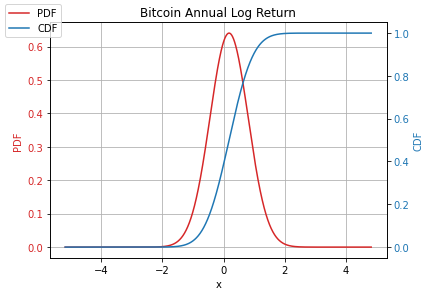

In [ ]:
d220 = pd.DataFrame()
interval = 5 
d220['x'] = np.arange(-interval, interval, 0.001)-mu220

d220['pdf'] = norm.pdf(d220['x'], mu220, sigma220)
d220['cdf'] = norm.cdf(d220['x'], mu220, sigma220)


# Plot PDF and CDF
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(d220['x'], d220['pdf'], color=color, label='PDF')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('CDF', color=color)  
ax2.plot(d220['x'], d220['cdf'], color=color, label='CDF')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc="upper left")
plt.title("Bitcoin Annual Log Return")
plt.show()

## Value at risk (VaR)

In many circumstances, we need to solve a different type of problem with distributions. For example, finding quantiles of a normal distribution is a common task when performing statistical test in the financial risk management.
Normal distribution quantiles can be obtained using norm.ppf. PPF stands for percent point function. 

In finance, there is an important risk measure relating the quantile, that is value at risk or VaR. It estimates how much a set of investments might lose with a given probability. VaR is typically used by firms and the regulators in the financial industry to measure the amount of assess needed to cover possible loss. For example, 5% quantile of daily return is called a 95% VaR or VaR at the level of 95%. We can use a PPF to get a 5% of quantile which is negative 0.06. 
Hence, 95% of VaR is negative 0.06, it means that with 5% chance, the daily return is worse than -6%.

In [ ]:
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.95]
for quantile in quantiles:
    VaR = norm.ppf(quantile, mu, sigma)
    print("With {}% chance, the daily return is worse than {} percent.".format(quantile*100, VaR))

With 5.0% chance, the daily return is worse than -0.06826054332480203 percent.
With 10.0% chance, the daily return is worse than -0.053005840834193824 percent.
With 25.0% chance, the daily return is worse than -0.027515901826721412 percent.
With 50.0% chance, the daily return is worse than 0.0008052710077006838 percent.
With 75.0% chance, the daily return is worse than 0.02912644384212278 percent.
With 95.0% chance, the daily return is worse than 0.06987108534020335 percent.


## Wrapping Up

In this article we learned how to use fastquant package to get historical data of Bitcoin and find a normal distribution model for the data. We used the normal distribution model to assess the possible risks and rewards of trading Bitcoin. 


Now we come up with a very fundamental question.

Is it safe to use normal description to model Bitcoin or stock returns? 

Two famous professors in the field asset pricing, Fama and French responds in this way. Distribution of a daily and monthly stock return, are rather symmetric about their means, but the tails are fatter which means there are more outliers than would be expected with normal distributions. It means that, in reality the negative or positive results in the tails, may occur more often than we expect from the normal distribution model.
If we use normal distribution, this is debatable, at least for the returns of some assets with different time window size. To modal a fat tail, people proposed modal return using t-distributions with low degree of freedom. We will discuss and use t-distribution in the next articles.